In [1]:
from __future__ import print_function

plot_to_pdf = False

if plot_to_pdf:
    import matplotlib as mpl
    mpl.use('pdf')
    
    import matplotlib.pyplot as plt
    
    plt.rc('font', family='serif', serif='Times')
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('axes', labelsize=10)
    plt.rc('legend', fontsize=10)
    title_font_size = 12
    data_font_size = 8
else:
    import matplotlib.pyplot as plt

import pyexotica as exo
import numpy as np
from time import time

from tqdm import *

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
%matplotlib inline

from topological_memory_clustering.homology import *

In [2]:
exo.Setup.init_ros()

In [3]:
solver = exo.Setup.load_solver('resources/ada_cylindrical_obstacle.xml')
problem = solver.get_problem()
scene = problem.get_scene()

In [4]:
print(problem.goal_state)
problem.update(problem.goal_state) #start_state[:3])
scene.get_kinematic_tree().publish_frames()
print(scene.is_state_valid())

[5. 0. 0.]
True


In [5]:
solutions = []
for _ in range(50):
    traj = solver.solve()
    solutions.append(traj)
    print('Appending after', solver.get_planning_time())
solutions = np.asarray(solutions)
print(solutions.shape)

Appending after 0.003513166
Appending after 0.003144112
Appending after 0.00449667
Appending after 0.003211384
Appending after 0.003329053
Appending after 0.004034539
Appending after 0.003671344
Appending after 0.003718432
Appending after 0.003329154
Appending after 0.00483324
Appending after 0.004652715
Appending after 0.003043465
Appending after 0.003098894
Appending after 0.003790092
Appending after 0.00320704
Appending after 0.003440835
Appending after 0.002827971
Appending after 0.003037803
Appending after 0.003242981
Appending after 0.003221377
Appending after 0.003296472
Appending after 0.003439848
Appending after 0.003170136
Appending after 0.003366397
Appending after 0.003319526
Appending after 0.002841657
Appending after 0.003210127
Appending after 0.003439408
Appending after 0.003327273
Appending after 0.003158406
Appending after 0.003029486
Appending after 0.003055465
Appending after 0.003633867
Appending after 0.003383573
Appending after 0.00357082
Appending after 0.002881

In [6]:
vis = exo.VisualizationMoveIt(scene)
vis.display_trajectory(solutions[0])

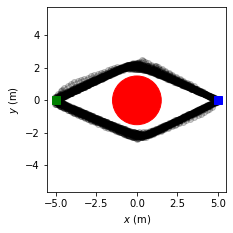

In [7]:
fig, ax = plt.subplots()
#fig.set_size_inches(6,4.5)
fig.set_size_inches(3,3)
for traj in solutions:
    plt.plot(traj[:,0],traj[:,1],'ko-', alpha=0.2)
ax.axis('equal')
ax.add_artist(matplotlib.patches.Circle((0,0),1.5,color='r'))
ax.add_artist(matplotlib.patches.Rectangle((-5.25,-0.25),0.5,0.5,color='g',zorder=10))
ax.add_artist(matplotlib.patches.Rectangle((4.75,-0.25),0.5,0.5,color='b',zorder=10))
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$y$ (m)')
plt.tight_layout()
fig.subplots_adjust(left=.16, bottom=0.135, right=.99, top=.99)
plot_to_pdf and fig.savefig('plot/ada_sample_trajectories.pdf')
plt.show()

# Analysis using Homology

In [8]:
demos = solutions.copy()
if len(solutions.shape) == 1:
    num_samples = solutions.shape[0]
    num_time = solutions[0].shape[0]
    num_state = solutions[0].shape[1]
    demos = np.zeros((num_samples, num_time, num_state))
    for i in range(num_samples):
        demos[i,:,:] = solutions[i]
    print(demos.shape)
    solutions = demos

In [10]:
result, D = compute_homology_filtration(solutions, debug=True)

Distance computation time: 0.36900949478149414
Trajectory distance modification time: 9.441375732421875e-05
[Dense] Elapsed Time: 204 seconds, 2253730 Edges added


In [12]:
from topological_memory_clustering.plot import plot_diagrams

Original Distance Matrix: 2253730 Edges


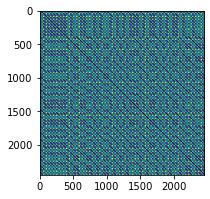

Full Filtration: Elapsed Time 204.15 Seconds


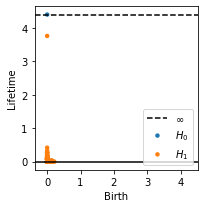

In [13]:
fig = plt.figure()
fig.set_size_inches(3,3)
plt.imshow(D)
print("Original Distance Matrix: %i Edges" % result['num_edges'])
# plt.title("Original Distance Matrix: %i Edges"%resultfull_traj_mod['num_edges'], fontsize=10)
plt.tight_layout()
plot_to_pdf and fig.savefig('plot/ada_distance_matrix.pdf')
plt.show()

fig = plt.figure()
fig.set_size_inches(3,3)
plot_diagrams(result['dgms'], show=False, lifetime=True)
# plt.title("Full Filtration: Elapsed Time %g Seconds"%np.round(timefull_traj_mod,2), fontsize=10)
print("Full Filtration: Elapsed Time %g Seconds" % np.round(result['time_dense'], 2))
plt.tight_layout()
plot_to_pdf and fig.savefig('plot/ada_filtration.pdf')
plt.show()

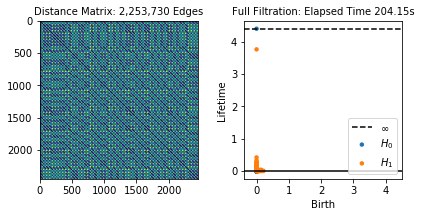

In [14]:
# fig = plt.figure()
fig, ax = plt.subplots()
fig.set_size_inches(6,3)
plt.subplot(1, 2, 1)
plt.imshow(D)
plt.title(r'Distance Matrix: {:,} Edges'.format(result['num_edges']), fontsize=10)
plt.subplot(1, 2, 2)
plot_diagrams(result['dgms'], show=False, lifetime=True)
plt.title(r'Full Filtration: Elapsed Time {:.2f}s'.format(result['time_dense']), fontsize=10)
plt.tight_layout()
plot_to_pdf and fig.savefig('plot/ada_filtration.pdf')
plt.show()

In [15]:
np.sort(result['dgms'][1][:,1]-result['dgms'][1][:,0])

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0002, 0.0002, 0.0002, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0004, 0.0004, 0.0004, 0.0004, 0.0005, 0.0005, 0.0005, 0.0005, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0007, 0.0007, 0.0007, 0.0008, 0.001 , 0.001 , 0.001 , 0.0013, 0.0013, 0.0014, 0.0014, 0.0014, 0.0015, 0.0016, 0.0016, 0.0016, 0.0017, 0.0017, 0.0019, 0.002 , 0.002 , 0.002 , 0.0022, 0.0022,
       0.0022, 0.0023, 0.0026, 0.0026, 0.0026, 0.0029, 0.0031, 0.0031, 0.0032, 0.0032, 0.0032, 0.0034, 0.0035, 0.0036, 0.0039, 0.0039, 0.0043, 0.0043, 0.0052, 0.0052, 0.0054, 0.0054, 0.0055, 0.0056, 0.0057, 0.0058, 0.0058, 0.0061, 0.0062, 0.0064, 0.0064, 0.0064, 0.0064, 0.0065, 0.0071, 0.0071, 0.0073, 0.0077, 0.0077, 0.0077, 0.008 , 0.0082, 0.0083, 0.009 , 0.0091, 0.0095, 0.0095, 0.01  , 0.0106, 0.0108, 0.0112, 0.0113, 0.0113, 0.0115, 0.0118, 0.0118, 0.0119, 0.0119, 0.0119, 0.0121, 0.0122,
       0.0

# Scalability Analysis

In [16]:
from scipy import signal
from scipy import interpolate
from tqdm import tqdm
from matplotlib import colors

In [17]:
debug_plot_scalability = False

print(solutions.shape)
scalability = np.nan * np.ones((solutions.shape[0]+1, solutions.shape[1]+1))

T_old = solutions.shape[1]
D = solutions.shape[2] # Dimension of state space
N_lower = 2
T_lower = 5
for N in tqdm(range(N_lower, solutions.shape[0], 2)):
    s = time()
    for T_new in range(T_lower, solutions.shape[1], 2):        
        debug_plot_scalability and plt.figure()
        debug_plot_scalability and plt.plot(demos_tmp[0,:,0], demos_tmp[0,:,1], '-.', label='Original')
        
        demos_tmp = np.zeros((N, T_new, D))
        for n in range(N):
            for d in range(D):
                range_old = np.linspace(0, 1, T_old)
                range_new = np.linspace(0, 1, T_new)
                my_interp = interpolate.interp1d(range_old, solutions[n,:,d], kind='cubic')
                demos_tmp[n,:,d] = my_interp(range_new)
                
        debug_plot_scalability and plt.plot(demos_tmp[0,:,0], demos_tmp[0,:,1], '--x', label='Resampled')
        debug_plot_scalability and plt.legend()
        debug_plot_scalability and plt.show()
        
        #print(N, time_subsampling, demos_tmp.shape)
        result_tmp, D_tmp = compute_homology_filtration(demos_tmp, debug=False)
        scalability[N,T_new] = result_tmp['time_dense']
        
        #print("N={0}\t T={1}\t time={2:.3f}".format(N, T_new, result_tmp['time_dense']))
        del result_tmp, D_tmp
    e = time()
    print(N, "took", e-s)

  4%|▍         | 1/24 [00:00<00:03,  6.20it/s](50, 50, 3)
2 took 0.1613001823425293
100%|██████████| 24/24 [1:43:49<00:00, 259.57s/it]48 took 973.3613908290863



In [18]:
# np.save('scalability', scalability)

In [19]:
scalability_expected = np.nan * np.ones((solutions.shape[0]+1, solutions.shape[1]+1))
for N in range(2, solutions.shape[0]):
    for T_new in range(5, solutions.shape[1]):
        scalability_expected[N,T_new] = (N*(T_new-1))**2

In [20]:
array = scalability.copy()

x = np.arange(0, array.shape[1])
y = np.arange(0, array.shape[0])
#mask invalid values
array = np.ma.masked_invalid(array)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]

GD1 = interpolate.griddata((x1, y1), newarr.ravel(),
                          (xx, yy),
                             method='cubic')
GD1[-2,:]= GD1[-3,:]

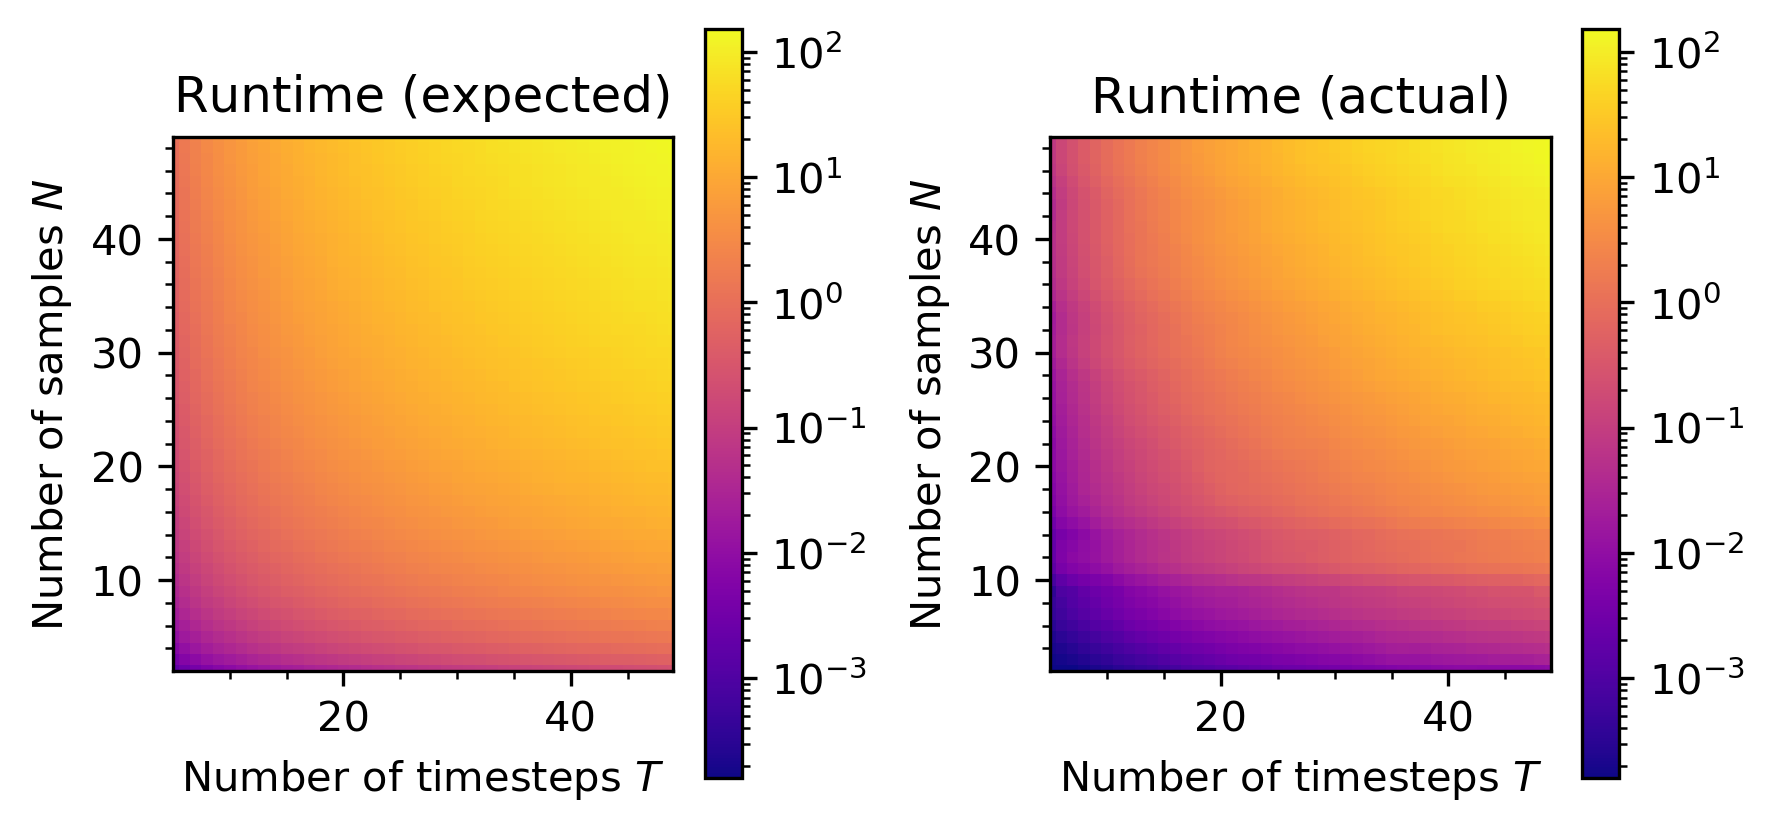

False

In [21]:
fig = plt.figure()
fig.set_dpi(300)
fig.set_size_inches(6,3)

plt.subplot(122)
plt.title('Runtime (actual)')
# plt.imshow(scalability, cmap='plasma', origin='lower', norm=colors.LogNorm(vmin=np.nanmin(scalability), vmax=np.nanmax(scalability)), interpolation='kaiser')
plt.imshow(GD1, cmap='plasma', origin='lower', norm=colors.LogNorm(vmin=np.nanmin(scalability), vmax=np.nanmax(scalability)))
plt.ylabel(r'Number of samples $N$')
plt.xlabel(r'Number of timesteps $T$')
plt.ylim(N_lower, solutions.shape[0]-1)
plt.xlim(T_lower, solutions.shape[1]-1)
plt.minorticks_on()
plt.colorbar()

plt.subplot(121)
plt.title('Runtime (expected)')
plt.imshow(scalability_expected * (np.nanmax(scalability) / np.nanmax(scalability_expected)), cmap='plasma', origin='lower', norm=colors.LogNorm(vmin=np.nanmin(scalability), vmax=np.nanmax(scalability)))
plt.ylabel(r'Number of samples $N$')
plt.xlabel(r'Number of timesteps $T$')
plt.ylim(N_lower, solutions.shape[0]-1)
plt.xlim(T_lower, solutions.shape[1]-1)
plt.minorticks_on()
plt.colorbar()

plt.tight_layout()
plt.show()

plot_to_pdf and fig.savefig('plot/ada_scalability_runtime.pdf')